# Plotly 활용해서 그래프를 그리는 대표적인 방법

## 1. graph_objects 모듈을 활용한 생성

- 그래프를 하나하나 설명하고 직접 지정하여 제작하는 방법

- [Reference](https://plotly.com/python/reference/)

### data : Trace라고 불리는 그래프 타입과( 그 그래프에 시각화 하고자하는 Raw 데이터를 품고 있는 단위 
   ##### -  trace를 Python list 형태로 받는게 기본
   ##### -  trace : [go.Bar(x=[1,2,3], y=[1,3,2])
   

---

### layout : data외 모든 부분을 편짐, 가공하는 부분
   ##### : Title, legend, Colors, Gover-level, Axes, Shape 등 그래프 시각화 도구 지정


In [7]:
import plotly.graph_objects as go

# figure를 통해 기본 그래프 생성
fig = go.Figure(
    # Data 입력
    data = [go.Bar(x=[1,2,3], y=[1,3,2])],
    # layout 입력
    layout = go.Layout(        
        title=go.layout.Title(text='A Figure By a Graph Objects')
    )
)

# 그래프 그리기 (Figure 랜더링)
fig.show()

## 2. express 모듈을 활용한 그래프 생성

- 이미 제작되어 있는 템플릿으로 빠르게 제작하는 방법
- [reference](https://plotly.com/python-api-reference/plotly.express.html)


In [9]:
import plotly.express as px

fig = px.bar(x=['a', 'b', 'c'], y=[1, 2, 3], title = 'A Figure By a Graph Objects' )

fig.show()

### 장단점

<table>
    <tr>
        <th></th>
        <th>장점</th>
        <th>단점</th>
    </tr>
    <tr>
        <td>graph_objects</td>
        <td>세세하게 그래프 구성 가능</td>
        <td>가독성 떨어짐, 학습에 부담</td>
    </tr>
    <tr>
        <td>express 모듈</td>
        <td>가독성 좋고, 쉽게 표현 가능</td>
        <td>템플릿에 종속</td>
    </tr>
</table>
<br>
    
- graph_objects : 논문, 발표 자료와 같이 그래프 visualization에 중점을 두어야 할 경우 추천

- express : 사용자가 빠르게 데이터 흐름, 분석을 수행하고자 할 때 추천


## 3. 그래프 업데이트

- 그래프 튜닝


### **[add_trace] 메소드**

* Figure에 새로운 Trace 추가

In [2]:
import plotly.graph_objects as go

fig = go.Figure()

# 추가
fig.add_trace(go.Bar(x = [1,2,3], y=[1,3,2]))

fig.show()


In [10]:
# 2) 이미 Trace가 있는 Figure에 다른 Trace를 추가하여 그리기

import plotly.express as px
import plotly.graph_objects as go

# 데이터 로딩
df = px.data.iris()

# express 모듈로 scatter plot 생성
fig = px.scatter(data_frame=df, x='sepal_width', y='sepal_length', color='species',
           title='express figure에 trace 추가')

# trace 추가
fig.add_trace(
    go.Scatter(
        x = [2, 4],
        y = [4, 8],
        mode = 'lines',
        line = go.scatter.Line(color='gray'),
        showlegend=False        
    )
)



fig.show()


### **[update_trace] 메소드**

- 이미 생성된 trace의 type,color,stylle, template등 추가 편집이 필요할 때

In [20]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

# Trace 추가
fig.add_scatter(y=[4, 2, 3.5], mode='markers', marker=dict(size=20, color='LightSeaGreen'),
                name = 'a', row=1, col=1)

fig.add_bar(y=[2, 1, 3], marker=dict(color='MediumPurple'), name='b', row=1, col=1)

fig.add_scatter(y=[2, 3.4, 4], mode='markers', marker=dict(size=20, color='MediumPurple'),
                name='c', row=1, col=2)

fig.add_bar(y=[1,3,2], marker=dict(color='LightSeaGreen'),
            name='d', row=1, col=2)



# update trace
# 한 번에 bar plot만 blue로 변경
fig.update_traces(marker=dict(color='RoyalBlue'),
                  selector=dict(type='bar'))


fig.show()

### **[update_layout] 메소드**

- Trace 외적인 그래프 요소(그래프 사이즈.  제목. 글꼴크기 등)를 업데이트 가능


In [23]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Bar(x=[1,2,3], y=[1,3,2]))

# Layout 추가
fig.update_layout(title_text='update를 통한 새로운 타이틀', title_font_size=30)


fig.show()

### **update_xaxes() | update_yaxes()**

- 각각 x, y축에 관한 다양한 편집 가능

In [29]:
import plotly.graph_objects as go
import plotly.express as px

# 데이터 로딩
df = px.data.tips()
x = df.total_bill
y = df.tip


# 그래프 그리기
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))


# 축 타이틀 추가
fig.update_xaxes(title_text='Total Bill($)')
fig.update_yaxes(title_text='Tip')


fig.show()



## 4.Colormap 사용

### 1) 불연속 데이터용 colormap

- 색을 연속적인 그라데이션의 묶음으로 구분하지 않은 색의 모음
- 주로 Bar 차트와 같은 범주형 데이터나 label이 필요한 구분에 유용


In [31]:
fig = px.colors.qualitative.swatches()

fig.show()

In [45]:
# 데이터 로딩
df = px.data.gapminder().query('year==2007')

# 그래프 그리기
fig = px.bar(df, y='continent', x='pop', color='continent'
             ,color_discrete_sequence=px.colors.qualitative.G10) 

fig.show()

### 2) 연속형 데이터용 colormap
- 수치데이터와 같은 구분이 힘든 연속형 데이터에 유용

In [34]:
fig = px.colors.sequential.swatches_continuous()

fig.show()

In [47]:
df = px.data.iris()

fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species',
                 color_continuous_scale=px.colors.sequential.Aggrnyl)

fig.show()

### 3) 발산데이터용 colormap

- 중간에 흰색으로 수렴을 하는 연속형 데이터에 유용


In [36]:
fig = px.colors.diverging.swatches_continuous()

fig.show()

### 4) 순환데이터용 colormap

- 순환하는 시간 데이터 (시간, 요일, 계절)에 유용


In [38]:
fig = px.colors.cyclical.swatches_cyclical()

fig.show()

## 5. Plotly 템플릿 활용

- 이미 완성되어 있는 스타일의 템플릿을 제공
- 개발자가 직접 커스터마이징한 스타일의 템플릿을 제작해서 사용가능

In [48]:
import plotly.io as pip

pip.templates

Templates configuration
-----------------------
    Default template: 'plotly_dark'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [49]:
df = px.data.gapminder().query('year==2007')

temp_list = ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation','none']

for template in temp_list:
    fig = px.scatter(df,
                     x='gdpPercap', y='lifeExp', size='pop', color='continent',
                     log_x=True, size_max=60,
                     template= template, title=f'GapMinder 2007 : {template} theme')
    fig.show()
    


---
# 템플릿 적용

## 1) 기본 템플릿으로 적용

    import plotly.io as pip
    pip.template.default = '<template>'
    

## 2) express에서 템플릿 지정
    
    px.scatter(template='<template>')
    

## #) graph_objects 템플릿 지정

    update_layout(template='<template>')

---
## **[직접 템플릿 제작해서 사용]**

### 1. 워터마크 템플릿 생성


In [52]:
import plotly.graph_objects as go

# 워터마크 템플릿 생성
watermark_template = go.layout.Template(
    layout_annotations=[
        dict(
            name='watermark_template',
            text='제작: JhleO',
            textangle=35,
            opacity=0.1,
            font=dict(color='black', size=50),
            xref='paper',
            yref='paper',
            x=0.5,
            y=0.5,
            showarrow=False
        )
    ]
)

### 2) 커스터마이징한 템플릿 적용

In [60]:
# Figure 생성
fig = go.Figure()

# Trace 생성
fig.add_trace(
    go.Scatter(
        x=[0, 1, 2, 3, 4, 5],
        y=[1.5, 1, 1.3, 0.7, 0.8, 0.9]
    )
)

# 템플릿 추가
fig.update_layout(template=watermark_template)

fig.show()

In [64]:
# express module

fig = px.scatter(df, x='gdpPercap', y='lifeExp', size='pop', color='continent', log_x=True, size_max=60)

fig.update_layout(template=watermark_template)


fig.show()

##  6. 파일로 추출하기

- kaleido 별도의 패키지가 필요


    # 일반 파이썬
    pip install -U kaleido
    # anaconda 사용자
    conda install -c conda-forge python-kaleido    

In [71]:
! pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-macosx_10_11_x86_64.whl.metadata (15 kB)
Using cached kaleido-0.2.1-py2.py3-none-macosx_10_11_x86_64.whl (85.2 MB)


In [73]:
fig = px.scatter(df, x='gdpPercap', y='lifeExp', size='pop', color='continent', log_x=True, size_max=60)

fig.update_layout(template=watermark_template)

fig.show()

fig.write_image('fig1.jpeg')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


## 7. Plotly를 pandas 기본 backend로 설정

    import pandas as pd
    pd.options.plotting.backend = 'plotly'

<AxesSubplot:>

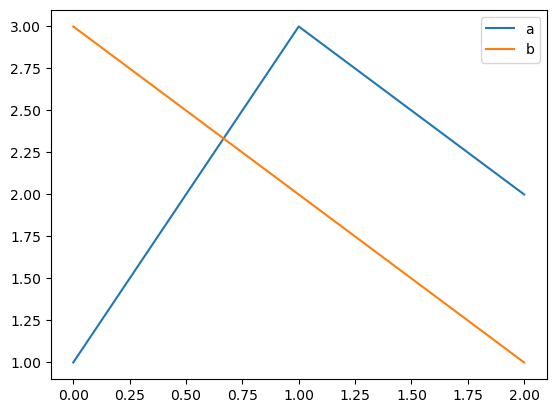

In [75]:
import pandas as pd

df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1,]))

df.plot()

In [81]:
import pandas as pd
pd.options.plotting.backend = 'plotly'


df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1,]))
fig = df.plot()

fig.show()